#Data

In [1]:
# Install Geopandas
# Install mapclassify
%pip install geopandas --quiet
%pip install mapclassify --quiet

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 


In [2]:
# import libraries
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable


# to display all float numbers of the dataframe in the notebook with 0.2f precision
pd.options.display.float_format = "{:,.2f}".format

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Brasil_pop = pd.read_excel('/content/drive/My Drive/Projeto-Modulo1-Datascience/Data/Brasil_Populacao.xlsx', 
                           #encoding = "latin1", 
                           #delimiter=';',
                           header=0) 
Brasil_pop.head(10)

,Territorialidades,Região,% de pessoas em domicílios com energia elétrica 1991,% de pessoas em domicílios com energia elétrica 2000,% de pessoas em domicílios com energia elétrica 2010,População total 1991,População total 2000,População total 2010
0,Brasil,Brasil,84.84,93.46,98.58,"146,825,475.00","169,798,885.00","190,755,799.00"
1,Acre,Norte,62.87,75.82,91.14,"417,718.00","557,526.00","733,559.00"
2,Alagoas,Nordeste,75.74,89.81,98.98,"2,514,100.00","2,822,621.00","3,120,494.00"
3,Amapá,Norte,84.64,95.10,98.27,"289,397.00","477,032.00","669,526.00"
4,Amazonas,Norte,73.06,82.15,92.18,"2,103,243.00","2,812,557.00","3,483,985.00"
5,Bahia,Nordeste,68.73,80.91,96.45,"11,867,991.00","13,070,250.00","14,016,906.00"
6,Ceará,Nordeste,65.51,88.24,99.08,"6,366,647.00","7,430,661.00","8,452,381.00"
7,Distrito Federal,Centro-Oeste,98.26,99.67,99.91,"1,601,094.00","2,051,146.00","2,570,160.00"
8,Espírito Santo,Sudeste,93.27,98.66,99.83,"2,600,618.00","3,097,232.00","3,514,952.00"
9,Goiás,Centro-Oeste,87.13,97.25,99.39,"4,018,903.00","5,003,228.00","6,003,788.00"


In [5]:
Brasil_pop = Brasil_pop.dropna()
Brasil_pop.drop(labels =['% de pessoas em domicílios com energia elétrica 1991','População total 1991'],inplace=True, axis=1)
Brasil_pop.head(5)

,Territorialidades,Região,% de pessoas em domicílios com energia elétrica 2000,% de pessoas em domicílios com energia elétrica 2010,População total 2000,População total 2010
0,Brasil,Brasil,93.46,98.58,"169,798,885.00","190,755,799.00"
1,Acre,Norte,75.82,91.14,"557,526.00","733,559.00"
2,Alagoas,Nordeste,89.81,98.98,"2,822,621.00","3,120,494.00"
3,Amapá,Norte,95.10,98.27,"477,032.00","669,526.00"
4,Amazonas,Norte,82.15,92.18,"2,812,557.00","3,483,985.00"


In [6]:
print (Brasil_pop.to_latex(columns=['Territorialidades','População total 2000', '% de pessoas em domicílios com energia elétrica 2000'], 
                           column_format='rlc',
                           index=False))

\begin{tabular}{rlc}
\toprule
   Territorialidades &  População total 2000 &  \% de pessoas em domicílios com energia elétrica 2000 \\
\midrule
              Brasil &        169,798,885.00 &                                              93.46 \\
                Acre &            557,526.00 &                                              75.82 \\
             Alagoas &          2,822,621.00 &                                              89.81 \\
               Amapá &            477,032.00 &                                              95.10 \\
            Amazonas &          2,812,557.00 &                                              82.15 \\
               Bahia &         13,070,250.00 &                                              80.91 \\
               Ceará &          7,430,661.00 &                                              88.24 \\
    Distrito Federal &          2,051,146.00 &                                              99.67 \\
      Espírito Santo &          3,097,232.00 &  

In [7]:
#Renaming columns
Brasil_pop=Brasil_pop.rename(columns={"% de pessoas em domicílios com energia elétrica 2000": "Percentual pessoas com energia 2000"})
Brasil_pop=Brasil_pop.rename(columns={"% de pessoas em domicílios com energia elétrica 2010": "Percentual pessoas com energia 2010"})

In [8]:
print (Brasil_pop.to_latex(columns=['Territorialidades','Região','População total 2000','Percentual pessoas com energia 2000', 'População total 2010','Percentual pessoas com energia 2010'], 
                           column_format='rlc',
                           index=False))

\begin{tabular}{rlc}
\toprule
   Territorialidades &        Região &  População total 2000 &  Percentual pessoas com energia 2000 &  População total 2010 &  Percentual pessoas com energia 2010 \\
\midrule
              Brasil &        Brasil &        169,798,885.00 &                                93.46 &        190,755,799.00 &                                98.58 \\
                Acre &         Norte &            557,526.00 &                                75.82 &            733,559.00 &                                91.14 \\
             Alagoas &      Nordeste &          2,822,621.00 &                                89.81 &          3,120,494.00 &                                98.98 \\
               Amapá &         Norte &            477,032.00 &                                95.10 &            669,526.00 &                                98.27 \\
            Amazonas &         Norte &          2,812,557.00 &                                82.15 &          3,483,985.00 &      

In [9]:
Brasil_pop['Pessoas sem energia 2000'] = (1 - Brasil_pop['Percentual pessoas com energia 2000']/100)*Brasil_pop['População total 2000']
Brasil_pop['Pessoas sem energia 2010'] = (1 - Brasil_pop['Percentual pessoas com energia 2010']/100)*Brasil_pop['População total 2010']
Brasil_pop.head(30)

,Territorialidades,Região,Percentual pessoas com energia 2000,Percentual pessoas com energia 2010,População total 2000,População total 2010,Pessoas sem energia 2000,Pessoas sem energia 2010
0,Brasil,Brasil,93.46,98.58,"169,798,885.00","190,755,799.00","11,104,847.08","2,708,732.35"
1,Acre,Norte,75.82,91.14,"557,526.00","733,559.00","134,809.79","64,993.33"
2,Alagoas,Nordeste,89.81,98.98,"2,822,621.00","3,120,494.00","287,625.08","31,829.04"
3,Amapá,Norte,95.10,98.27,"477,032.00","669,526.00","23,374.57","11,582.80"
4,Amazonas,Norte,82.15,92.18,"2,812,557.00","3,483,985.00","502,041.42","272,447.63"
5,Bahia,Nordeste,80.91,96.45,"13,070,250.00","14,016,906.00","2,495,110.73","497,600.16"
6,Ceará,Nordeste,88.24,99.08,"7,430,661.00","8,452,381.00","873,845.73","77,761.91"
7,Distrito Federal,Centro-Oeste,99.67,99.91,"2,051,146.00","2,570,160.00","6,768.78","2,313.14"
8,Espírito Santo,Sudeste,98.66,99.83,"3,097,232.00","3,514,952.00","41,502.91","5,975.42"
9,Goiás,Centro-Oeste,97.25,99.39,"5,003,228.00","6,003,788.00","137,588.77","36,623.11"


In [10]:
Estado_regiao = copy.deepcopy(Brasil_pop)
Estado_regiao.drop(labels =['Percentual pessoas com energia 2000',
                            'Percentual pessoas com energia 2010',
                            'População total 2000',
                            'População total 2010',
                            'Pessoas sem energia 2000',
                            'Pessoas sem energia 2010'],inplace=True, axis=1)
Estado_regiao=Estado_regiao.rename(columns={"Territorialidades": "lptestado"})
Estado_regiao

,lptestado,Região
0,Brasil,Brasil
1,Acre,Norte
2,Alagoas,Nordeste
3,Amapá,Norte
4,Amazonas,Norte
5,Bahia,Nordeste
6,Ceará,Nordeste
7,Distrito Federal,Centro-Oeste
8,Espírito Santo,Sudeste
9,Goiás,Centro-Oeste


In [11]:
Regiao_pop= Brasil_pop.groupby(['Região']).sum()
Regiao_pop.drop(labels =['Percentual pessoas com energia 2000','Percentual pessoas com energia 2010'],inplace=True, axis=1)
Regiao_pop.reset_index(inplace = True)
Regiao_pop.head()

,Região,População total 2000,População total 2010,Pessoas sem energia 2000,Pessoas sem energia 2010
0,Brasil,"169,798,885.00","190,755,799.00","11,104,847.08","2,708,732.35"
1,Centro-Oeste,"11,636,728.00","14,058,094.00","499,497.97","132,886.81"
2,Nordeste,"47,741,426.00","53,081,950.00","6,450,015.91","1,186,904.74"
3,Norte,"12,900,704.00","15,864,454.00","2,631,719.13","1,121,185.61"
4,Sudeste,"72,412,411.00","80,364,410.00","1,017,510.30","183,285.99"


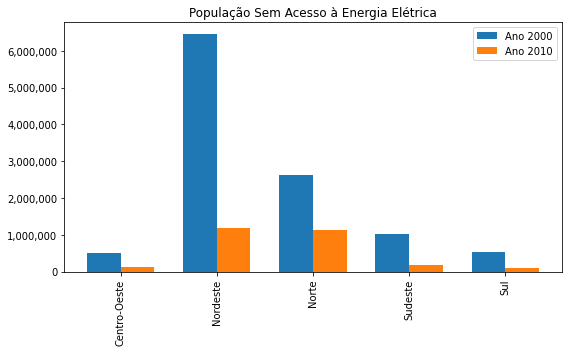

In [12]:
labels = Regiao_pop.query("Região != 'Brasil'")["Região"]
x1_values = list(Regiao_pop.query("Região != 'Brasil'")["Pessoas sem energia 2000"])
x2_values = list(Regiao_pop.query("Região != 'Brasil'")["Pessoas sem energia 2010"])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(8,5)
#rects1 = ax.bar(x , x1_values, width, label='Ano 2000')
rects1 = ax.bar(x - width/2, x1_values, width, label='Ano 2000')
rects2 = ax.bar(x + width/2, x2_values, width, label='Ano 2010')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('')
ax.set_title('População Sem Acesso à Energia Elétrica')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig.tight_layout()

plt.show()


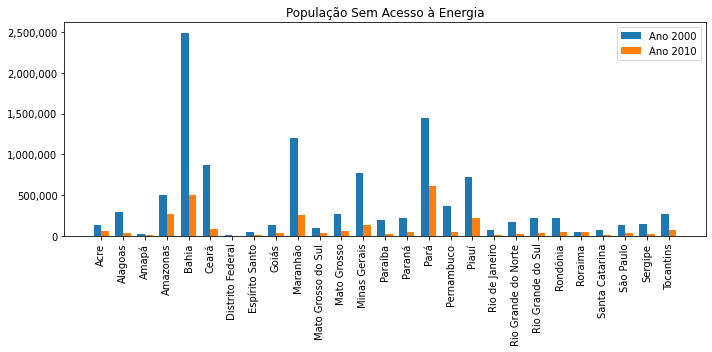

In [13]:
#Creating double bar graph Pessoas sem energia 2000 Pessoas sem energia 2010
labels = list(Brasil_pop.query("Territorialidades != 'Brasil'")["Territorialidades"])
x1_values = list(Brasil_pop.query("Territorialidades != 'Brasil'")["Pessoas sem energia 2000"])
x2_values = list(Brasil_pop.query("Territorialidades != 'Brasil'")["Pessoas sem energia 2010"])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
#rects1 = ax.bar(x, x1_values, width, label='Ano 2000')
rects1 = ax.bar(x - width/2, x1_values, width, label='Ano 2000')
rects2 = ax.bar(x + width/2, x2_values, width, label='Ano 2010')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('')
ax.set_title('População Sem Acesso à Energia')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig.tight_layout()

plt.show()



Data available at:  https://www.gov.br/mme/pt-br/acesso-a-informacao/dados-abertos/programas-luz-para-todos-e-mais-luz-para-amazonia

Below follow the data that will be loaded:

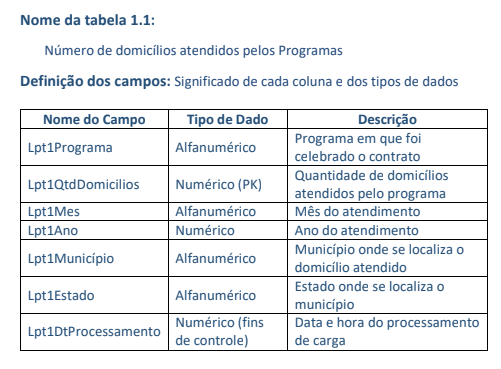
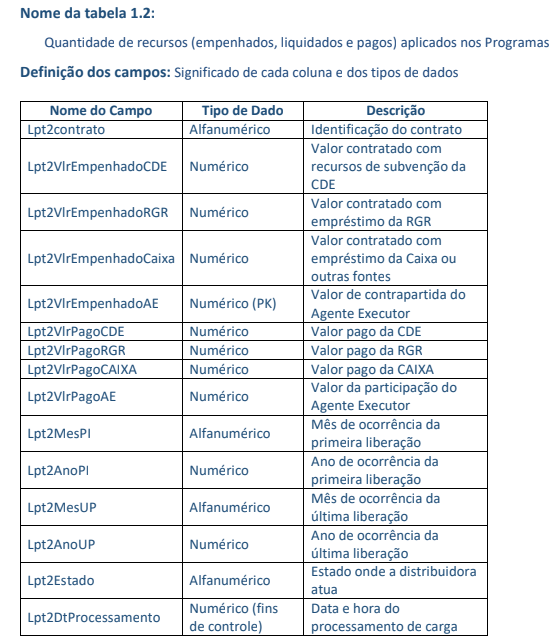


# Data Analysis - Residences

In [14]:
# import accent in portuguese with enconding = 'latin1'
# delimiter used is ';'

residences = pd.read_csv('/content/drive/My Drive/Projeto-Modulo1-Datascience/Data/lpt1domiciliosatendidos_jun2021.csv', 
                         converters={'lpt1mes':str,'lpt1ano':str},
                         encoding = "latin1", delimiter=';', header=0)
residences=residences.rename(columns={"lpt1estado": "lptestado"})

residences.head() # display the 5 first lines

,lpt1programa,lpt1qtddomicilios,lpt1mes,lpt1ano,lpt1municipio,lptestado,lpt1DtProcessamento
0,Luz para Todos,250.00,12,2004,Acrelândia,Acre,2021-06-30 23:00:00
1,Luz para Todos,4.00,1,2005,Acrelândia,Acre,2021-06-30 23:00:00
2,Luz para Todos,112.00,2,2005,Acrelândia,Acre,2021-06-30 23:00:00
3,Luz para Todos,134.00,3,2005,Acrelândia,Acre,2021-06-30 23:00:00
4,Luz para Todos,20.00,4,2005,Acrelândia,Acre,2021-06-30 23:00:00


In [15]:
# correct name of Paraíba
residences['lptestado'] = residences['lptestado'].replace(['Paraiba'],'Paraíba')

In [16]:
teste = residences.query("lptestado == 'Paraíba'")
print(teste)

                   lpt1programa  ...  lpt1DtProcessamento
90497  Recurso da Distribuidora  ...  2021-06-30 23:00:00
90498            Luz para Todos  ...  2021-06-30 23:00:00
90499            Luz para Todos  ...  2021-06-30 23:00:00
90500            Luz para Todos  ...  2021-06-30 23:00:00
90501            Luz para Todos  ...  2021-06-30 23:00:00
...                         ...  ...                  ...
96133            Luz para Todos  ...  2021-06-30 23:00:00
96134            Luz para Todos  ...  2021-06-30 23:00:00
96135  Recurso da Distribuidora  ...  2021-06-30 23:00:00
96136            Luz para Todos  ...  2021-06-30 23:00:00
96137            Luz para Todos  ...  2021-06-30 23:00:00

[5641 rows x 7 columns]


In [17]:
residences.shape

(153199, 7)

In [18]:
residences.drop(labels= ['lpt1programa','lpt1DtProcessamento'],inplace=True, axis=1)
residences.head()

,lpt1qtddomicilios,lpt1mes,lpt1ano,lpt1municipio,lptestado
0,250.00,12,2004,Acrelândia,Acre
1,4.00,1,2005,Acrelândia,Acre
2,112.00,2,2005,Acrelândia,Acre
3,134.00,3,2005,Acrelândia,Acre
4,20.00,4,2005,Acrelândia,Acre


In [19]:
residences = residences.dropna()
residences.shape

(153164, 5)

In [20]:
residences.drop(residences[residences.lpt1qtddomicilios	 == 0].index, inplace=True)
residences.shape

(152049, 5)

In [21]:
residences = residences.merge(Estado_regiao, on = 'lptestado', how = 'left')
residences.head()

,lpt1qtddomicilios,lpt1mes,lpt1ano,lpt1municipio,lptestado,Região
0,250.00,12,2004,Acrelândia,Acre,Norte
1,4.00,1,2005,Acrelândia,Acre,Norte
2,112.00,2,2005,Acrelândia,Acre,Norte
3,134.00,3,2005,Acrelândia,Acre,Norte
4,20.00,4,2005,Acrelândia,Acre,Norte


In [22]:
residences.dtypes

lpt1qtddomicilios    float64
lpt1mes               object
lpt1ano               object
lpt1municipio         object
lptestado             object
Região                object
dtype: object

In [23]:
#Concatenate Month and Year in order to create a single date value
residences['ltp1data']=pd.to_datetime(residences['lpt1mes']+residences['lpt1ano'],format='%m%Y')
residences.head()

,lpt1qtddomicilios,lpt1mes,lpt1ano,lpt1municipio,lptestado,Região,ltp1data
0,250.00,12,2004,Acrelândia,Acre,Norte,2004-12-01
1,4.00,1,2005,Acrelândia,Acre,Norte,2005-01-01
2,112.00,2,2005,Acrelândia,Acre,Norte,2005-02-01
3,134.00,3,2005,Acrelândia,Acre,Norte,2005-03-01
4,20.00,4,2005,Acrelândia,Acre,Norte,2005-04-01


In [24]:
top_10_residences= residences.query("Região != 'Brasil'")["Região"]

In [25]:
print (residences.head().to_latex(
                            #column_format='llc',
                            index=False
                            ))

\begin{tabular}{rllllll}
\toprule
 lpt1qtddomicilios & lpt1mes & lpt1ano & lpt1municipio & lptestado & Região &   ltp1data \\
\midrule
            250.00 &      12 &    2004 &    Acrelândia &      Acre &  Norte & 2004-12-01 \\
              4.00 &       1 &    2005 &    Acrelândia &      Acre &  Norte & 2005-01-01 \\
            112.00 &       2 &    2005 &    Acrelândia &      Acre &  Norte & 2005-02-01 \\
            134.00 &       3 &    2005 &    Acrelândia &      Acre &  Norte & 2005-03-01 \\
             20.00 &       4 &    2005 &    Acrelândia &      Acre &  Norte & 2005-04-01 \\
\bottomrule
\end{tabular}



In [26]:
residences_year=residences.groupby(['ltp1data']).sum()
residences_year_acc= residences_year.cumsum()
print("\nQuantidade de Residências por Mês\n",residences_year.head())
print()
print("\nQuantidade de Residências Acumulada por Mês \n",residences_year_acc.head())


Quantidade de Residências por Mês
             lpt1qtddomicilios
ltp1data                     
2004-04-01              14.00
2004-05-01             127.00
2004-06-01             328.00
2004-07-01           1,372.00
2004-08-01           3,332.00


Quantidade de Residências Acumulada por Mês 
             lpt1qtddomicilios
ltp1data                     
2004-04-01              14.00
2004-05-01             141.00
2004-06-01             469.00
2004-07-01           1,841.00
2004-08-01           5,173.00


In [27]:
#Find out the month where 2 millions residences was achieved
res_2millions = residences_year_acc.query('lpt1qtddomicilios >= 2000000').iloc[0]
res_3_3millions = residences_year_acc.query('lpt1qtddomicilios >= 3300000').iloc[0]


print("Data quando o número de residências atingidas foi de 2 milhões\n",res_2millions)
print()
print("Data quando o número de residências atingidas foi de 3,3 milhões\n",res_3_3millions)



Data quando o número de residências atingidas foi de 2 milhões
 lpt1qtddomicilios   2,002,743.00
Name: 2009-04-01 00:00:00, dtype: float64

Data quando o número de residências atingidas foi de 3,3 milhões
 lpt1qtddomicilios   3,301,267.00
Name: 2017-01-01 00:00:00, dtype: float64


In [28]:
#Find out the month where 2 millions residences was achieved
# residences_threshold_more_2kk= residences_year_acc.[residences_year_acc['lpt1qtddomicilios']>=2000000]
# residences_threshold_less_2kk=residences_year_acc[residences_year_acc['lpt1qtddomicilios']<2000000]


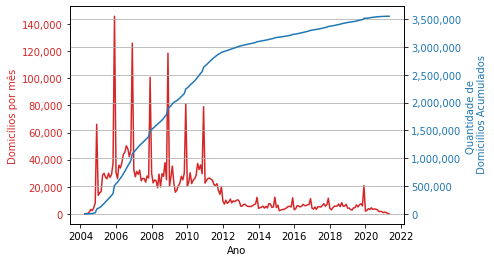

In [29]:


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Domicílios por mês', color=color)
ax1.plot(residences_year, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Quantidade de \n Domiciílios Acumulados', color=color)  # we already handled the x-label with ax1
ax2.grid(axis='y')
ax2.plot(residences_year_acc, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [30]:
# creating state_residences to store all residences in each state
state_residences = residences.groupby('lptestado').sum()
#state_residences = state_residences.drop(labels = ['lpt1mes', 'lpt1ano'], axis=1)
state_residences.reset_index(inplace = True)
state_residences.head(30)

,lptestado,lpt1qtddomicilios
0,Acre,"58,074.00"
1,Alagoas,"101,351.00"
2,Amapá,"8,702.00"
3,Amazonas,"137,282.00"
4,Bahia,"635,088.00"
5,Ceará,"168,689.00"
6,Espírito Santo,"60,206.00"
7,Goiás,"50,874.00"
8,Maranhão,"363,515.00"
9,Mato Grosso,"147,813.00"


In [31]:
state_residences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lptestado          26 non-null     object 
 1   lpt1qtddomicilios  26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 544.0+ bytes


In [32]:
# creating state_residences to store all residences in each state
region_residences = residences.groupby('Região')["lpt1qtddomicilios"].sum()
#state_residences = state_residences.drop(labels = ['lpt1mes', 'lpt1ano'], axis=1)
#region_residences.reset_index(inplace = True)
region_residences.head(30)

Região
Centro-Oeste     242,894.00
Nordeste       1,732,943.00
Norte            848,785.00
Sudeste          510,023.00
Sul              215,991.00
Name: lpt1qtddomicilios, dtype: float64

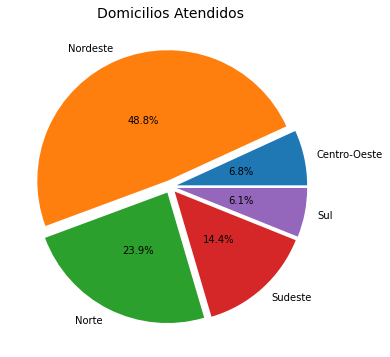

In [33]:
pie, ax = plt.subplots(figsize=[10,6])
labels = region_residences.keys()
plt.pie(x=region_residences,
        autopct="%.1f%%", 
        explode=[0.05]*5, 
        labels=labels, 
        pctdistance=0.5)
plt.title("Domicilios Atendidos", fontsize=14);

In [34]:
# loading Brazilian geometry file
state_info = gpd.read_file('/content/drive/My Drive/Projeto-Modulo1-Datascience/Data/bcim_2016_21_11_2018.gpkg',layer='lim_unidade_federacao_a')
state_info.head(30)

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,Alagoas,None,Sim,AL,27,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,Tocantins,None,Sim,TO,17,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,Roraima,None,Sim,RR,14,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,Amazonas,None,Sim,AM,13,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,Acre,None,Sim,AC,12,1000001,None,nan,None,None,None,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


In [35]:
# cleaning useless columns
state_info = state_info.drop(labels = ['nomeabrev',
                                       'id_elementoprodutor',
                                       'cd_insumo_orgao',
                                       'nr_insumo_mes',
                                       'nr_insumo_ano',
                                       'tx_insumo_documento',
                                       'id_produtor',
                                       'geometriaaproximada'],
                              axis=1)
state_info.rename({'nome':'lptestado'}, axis = 1, inplace = True)
state_info.head(30)

,lptestado,sigla,geocodigo,geometry
0,Goiás,GO,52,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,MS,50,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,PR,41,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,MG,31,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,SE,28,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,Alagoas,AL,27,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,Tocantins,TO,17,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,Roraima,RR,14,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,Amazonas,AM,13,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,Acre,AC,12,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


In [36]:
print (state_info.to_latex(
                            #column_format='llc',
                            index=False
                            ))

\begin{tabular}{llll}
\toprule
           lptestado & sigla & geocodigo &                                           geometry \\
\midrule
               Goiás &    GO &        52 &  MULTIPOLYGON (((-50.15876 -12.41581, -50.15743... \\
  Mato Grosso do Sul &    MS &        50 &  MULTIPOLYGON (((-56.09815 -17.17220, -56.09159... \\
              Paraná &    PR &        41 &  MULTIPOLYGON (((-52.08090 -22.52893, -52.04903... \\
        Minas Gerais &    MG &        31 &  MULTIPOLYGON (((-44.21152 -14.22955, -44.20750... \\
             Sergipe &    SE &        28 &  MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ... \\
             Alagoas &    AL &        27 &  MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ... \\
           Tocantins &    TO &        17 &  MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ... \\
             Roraima &    RR &        14 &  MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5... \\
            Amazonas &    AM &        13 &  MULTIPOLYGON (((-67.32285 2.04176, -67.2922

In [37]:
brazil_residences = state_info.merge(state_residences, on = 'lptestado', how = 'left')
brazil_residences = brazil_residences.dropna()
brazil_residences.head(30)

,lptestado,sigla,geocodigo,geometry,lpt1qtddomicilios
0,Goiás,GO,52,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...","50,874.00"
1,Mato Grosso do Sul,MS,50,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...","44,207.00"
2,Paraná,PR,41,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...","82,717.00"
3,Minas Gerais,MG,31,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...","328,413.00"
4,Sergipe,SE,28,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...","67,610.00"
5,Alagoas,AL,27,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...","101,351.00"
6,Tocantins,TO,17,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...","83,639.00"
7,Roraima,RR,14,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...","14,995.00"
8,Amazonas,AM,13,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...","137,282.00"
9,Acre,AC,12,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...","58,074.00"


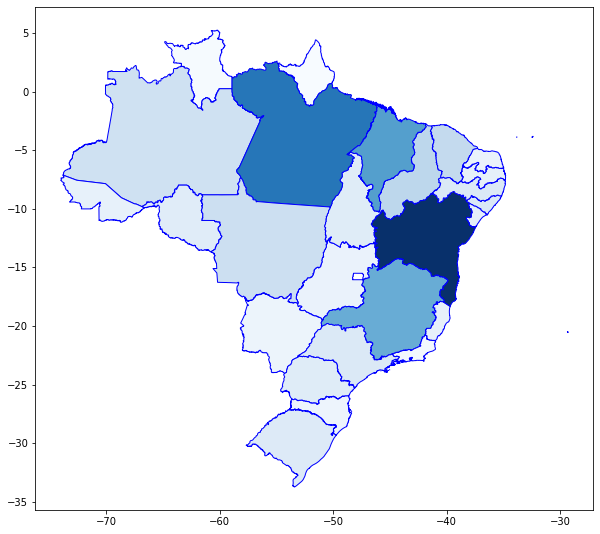

In [38]:
brazil_residences.plot(column="lpt1qtddomicilios",
            figsize=(10,10),
            legend = False,
            cmap='Blues',
            #scheme = 'equalintervals',
            #legend_kwds={"fmt": "{:.0f}"},
            edgecolor ='Blue',
            )


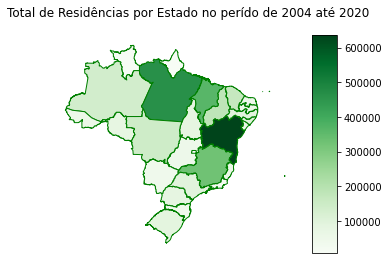

In [39]:

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="10%", pad="5%")

ax.set_axis_off()

fig.suptitle('Total de Residências por Estado no perído de 2004 até 2020')

brazil_residences.plot(column="lpt1qtddomicilios",
                        ax=ax,
                        legend=True,
                        cmap='Greens',
                        edgecolor ='Green',
                        cax = cax,
                        legend_kwds={'fmt': "{:.2f}"}
                        )

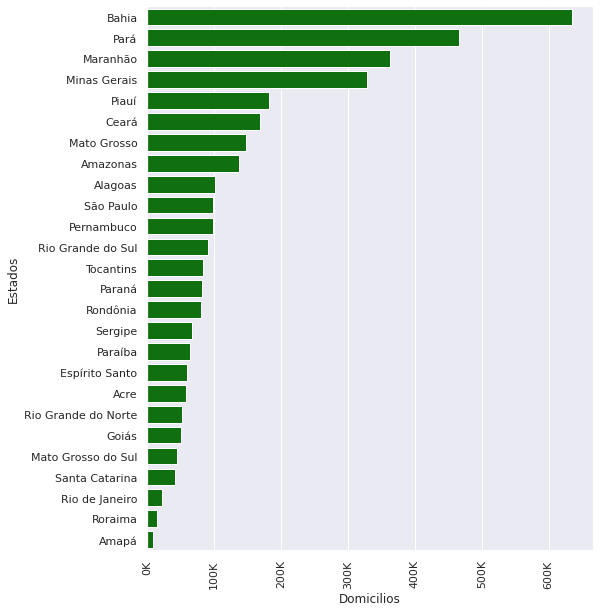

In [40]:
state_residences_sort = state_residences.sort_values(by='lpt1qtddomicilios')
sns.set(style="darkgrid")   
fig, ax = plt.subplots(figsize=(8, 10))   
g = sns.barplot(data = state_residences_sort,
            x = 'lpt1qtddomicilios',
            y = 'lptestado',
            color = 'green',
            orient='h',
            order=state_residences_sort.sort_values('lpt1qtddomicilios',ascending = False).lptestado
            ).set(xlabel='Domicilios', ylabel='Estados')
plt.xticks(rotation=90)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

In [41]:
year_residences = residences.groupby(['lpt1ano']).sum()
year_residences.reset_index(inplace=True)
year_residences

,lpt1ano,lpt1qtddomicilios
0,2004,"86,070.00"
1,2005,"426,204.00"
2,2006,"566,765.00"
3,2007,"407,866.00"
4,2008,"409,975.00"
5,2009,"346,992.00"
6,2010,"390,361.00"
7,2011,"267,207.00"
8,2012,"110,790.00"
9,2013,"80,562.00"


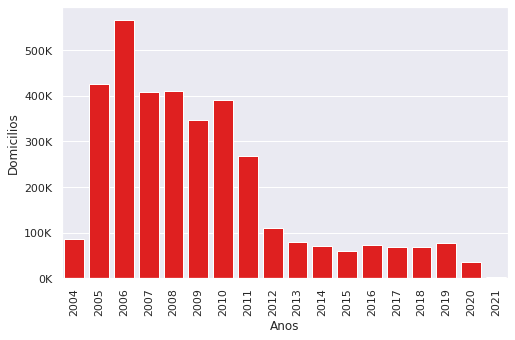

In [42]:
sns.set(style="darkgrid")   
fig, ax = plt.subplots(figsize=(8, 5))   
g = sns.barplot(data = year_residences,
            x = 'lpt1ano',
            y = 'lpt1qtddomicilios',
            color = 'red' 
            ).set(xlabel='Anos', ylabel='Domicilios')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

# Gráfico abaixo é o boxplot de domicílios, levando em conta cada linha do banco de dados

[Text(0.5, 0, 'Residences')]

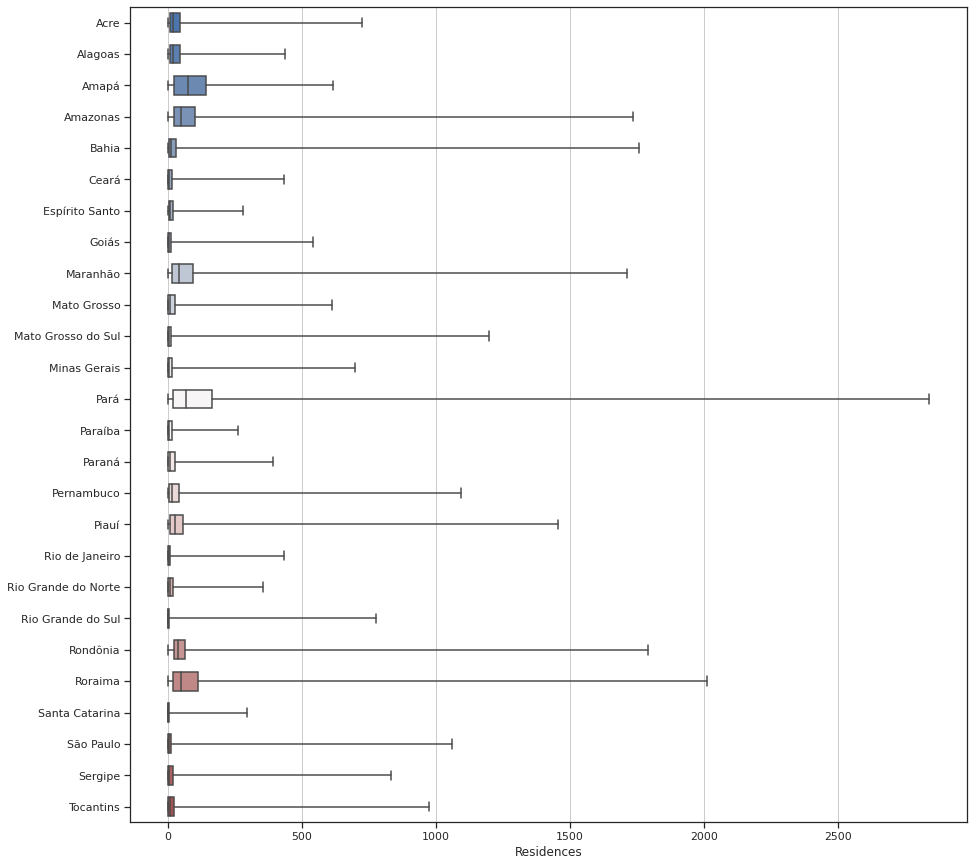

In [43]:
sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(x='lpt1qtddomicilios', 
            y='lptestado', 
            data=residences,
            whis=[0,100],
            width=.6,
            palette="vlag")

# Add in points to show each observation
# sns.stripplot(x='lpt1qtddomicilios', y='lptestado', data=residences,
#             size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="Residences")
# sns.despine(trim=True, left=True)

In [44]:
residences.head()

,lpt1qtddomicilios,lpt1mes,lpt1ano,lpt1municipio,lptestado,Região,ltp1data
0,250.00,12,2004,Acrelândia,Acre,Norte,2004-12-01
1,4.00,1,2005,Acrelândia,Acre,Norte,2005-01-01
2,112.00,2,2005,Acrelândia,Acre,Norte,2005-02-01
3,134.00,3,2005,Acrelândia,Acre,Norte,2005-03-01
4,20.00,4,2005,Acrelândia,Acre,Norte,2005-04-01


In [45]:
city_residences = residences.groupby(['lptestado', 'lpt1municipio'], as_index=False).sum()
#Municipio_domicilios = Municipio_domicilios.drop(labels = ['lpt1mes', 'lpt1ano'], axis=1)
city_residences.head(30)

,lptestado,lpt1municipio,lpt1qtddomicilios
0,Acre,Acrelândia,"2,808.00"
1,Acre,Assis Brasil,935.00
2,Acre,Brasiléia,"3,535.00"
3,Acre,Bujari,"2,837.00"
4,Acre,Capixaba,"2,477.00"
5,Acre,Cruzeiro do Sul,"5,220.00"
6,Acre,Epitaciolândia,"2,470.00"
7,Acre,Feijó,"2,342.00"
8,Acre,Jordão,154.00
9,Acre,Manoel Urbano,"1,436.00"


In [46]:
pd.options.display.float_format = "{:,.0f}".format
sort_residences = city_residences.sort_values(by='lpt1qtddomicilios', ascending=False,ignore_index=True )
sort_residences.head(10)
print (sort_residences.head(10).to_latex(label="municipio",
                                         caption='10 cidades com mais domicílios atendidos',
                            #column_format='llc',
                            index=False
                            ))

\begin{table}
\centering
\caption{10 cidades com mais domicílios atendidos}
\label{municipio}
\begin{tabular}{llr}
\toprule
lptestado &         lpt1municipio &  lpt1qtddomicilios \\
\midrule
     Pará &             Barcarena &             18,721 \\
     Pará &     Novo Repartimento &             16,225 \\
     Pará &              Santarém &             15,541 \\
 Rondônia &           Porto Velho &             11,343 \\
     Pará &                Marabá &             11,165 \\
    Bahia &  Vitória da Conquista &             10,906 \\
     Pará &                 Acará &             10,608 \\
     Pará &                Pacajá &             10,472 \\
     Pará &                  Moju &             10,466 \\
 Amazonas &           Itacoatiara &             10,433 \\
\bottomrule
\end{tabular}
\end{table}



In [47]:
pd.options.display.float_format = "{:,.2f}".format
city_residences.describe()

,lpt1qtddomicilios
count,"5,431.00"
mean,653.77
std,"1,135.71"
min,1.00
25%,84.00
50%,273.00
75%,732.50
max,"18,721.00"


In [48]:
print (city_residences.describe().to_latex(
                            #column_format='llc',
                            index=True
                            ))

\begin{tabular}{lr}
\toprule
{} &  lpt1qtddomicilios \\
\midrule
count &           5,431.00 \\
mean  &             653.77 \\
std   &           1,135.71 \\
min   &               1.00 \\
25\%   &              84.00 \\
50\%   &             273.00 \\
75\%   &             732.50 \\
max   &          18,721.00 \\
\bottomrule
\end{tabular}



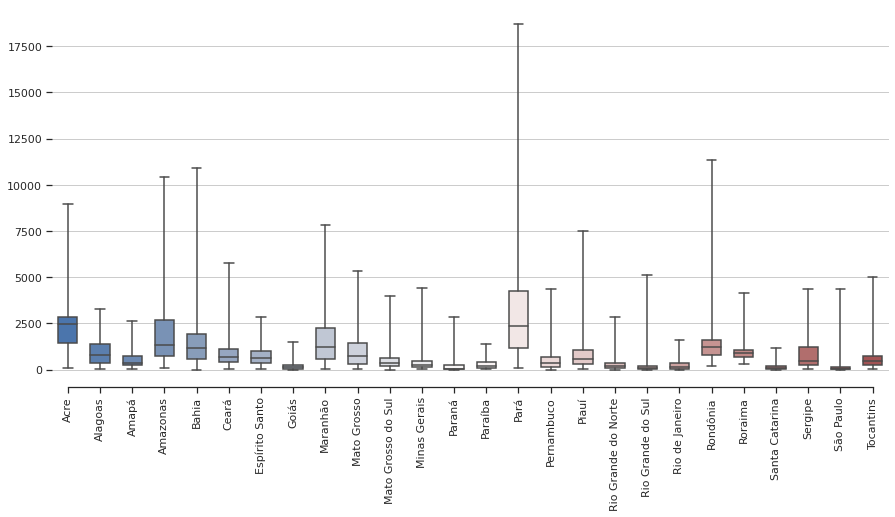

In [49]:
sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(x='lptestado', 
            y='lpt1qtddomicilios', 
            data=city_residences,
            whis=[0,100],
            width=.6,
            orient="v",
            palette="vlag")

# Add in points to show each observation
# sns.stripplot(x='lpt1qtddomicilios', y='lptestado', data=residences,
#             size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="")
sns.despine(trim=True, left=True)
plt.xticks(rotation = 'vertical');

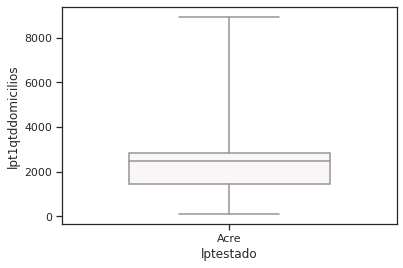

In [50]:
sns.boxplot(x='lptestado', 
            y='lpt1qtddomicilios', 
            data=city_residences.loc[city_residences['lptestado'] == "Acre"],
            whis=[0,100],
            width=.6,
            orient="v",
            palette="vlag")


# Data Analysis - Budget Allocated

In [51]:
import pandas as pd

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# to display all float numbers of the dataframe in the notebook with 0.2f precision
pd.options.display.float_format = "{:,.2f}".format

dateparse = lambda x: datetime.strptime(x, '%Y-%m-')

# load dataset
resources_applied = pd.read_csv('/content/drive/My Drive/Projeto-Modulo1-Datascience/Data/Rubens_lpt2recursosaplicados_jun2021.csv',
                                converters={'lpt2anoup':str,'lpt2mesup':str,'lpt2anopi':str,'lpt2mespi':str},
                                sep=';',encoding = "latin1", engine='python',error_bad_lines=False)

resources_applied=resources_applied.rename(columns={"lpt2estado": "lptestado"})

# rows and columns of the data
print(resources_applied.shape)

#Print columns type
print (resources_applied.dtypes)

resources_applied.head()

(376, 15)
lpt2contrato             object
lpt2vlrempenhadocde      object
lpt2vlrempenhadorgr      object
lpt2vlrempenhadocaixa    object
lpt2vlrempenhadoae       object
lpt2vlrpagocde           object
lpt2vlrpagorgr           object
lpt2vlrpagocaixa         object
lpt2vlrpago              object
lpt2mespi                object
lpt2anopi                object
lpt2mesup                object
lpt2anoup                object
lptestado                object
lpt1dtprocessamento      object
dtype: object


,lpt2contrato,lpt2vlrempenhadocde,lpt2vlrempenhadorgr,lpt2vlrempenhadocaixa,lpt2vlrempenhadoae,lpt2vlrpagocde,lpt2vlrpagorgr,lpt2vlrpagocaixa,lpt2vlrpago,lpt2mespi,lpt2anopi,lpt2mesup,lpt2anoup,lptestado,lpt1dtprocessamento
0,ECFS - Eletrobrás Contrato de Financiamento e ...,"53.772.800,00","0,00","0,00","6.721.590,00","48.748.419,00","0,00","0,00","6.093.549,00",1,2010,10,2013,Roraima,2021-06-30 23:00:00
1,ECFS - Eletrobrás Contrato de Financiamento e ...,"11.768.420,00","0,00","0,00","1.471.050,00","10.003.157,00","0,00","0,00","1.250.392,50",5,2007,5,2010,Amapá,2021-06-30 23:00:00
2,ECFS - Eletrobrás Contrato de Financiamento e ...,"132.086.740,00","0,00","0,00","15.539.660,00","66.043.550,00","0,00","0,00","7.769.830,00",8,2010,2,2012,Amapá,2021-06-30 23:00:00
3,ECFS - Eletrobrás Contrato de Financiamento e ...,"28.935.540,00","7.233.880,00","0,00","7.233.880,00","26.673.491,89","6.668.371,99","0,00","6.668.369,09",7,2004,5,2006,Alagoas,2021-06-30 23:00:00
4,ECFS - Eletrobrás Contrato de Financiamento e ...,"513.990.930,00","0,00","0,00","171.330.310,00","472.702.149,04","0,00","0,00","157.567.383,02",5,2014,5,2020,Bahia,2021-06-30 23:00:00


In [52]:
#Per viewing analysis we know that Collumn from 1 to 9(Python Column)
#Search all rows from second to eight column and replace dot by comma and comma by dot and convert to float
resources_applied.iloc[:,1:9] = resources_applied.iloc[:,1:9].apply(lambda x: x.str.replace('.',''))
resources_applied.iloc[:,1:9] = resources_applied.iloc[:,1:9].apply(lambda x: x.str.replace(',','.')).astype(float)

# visualise the dataset
resources_applied.head()

# visualise the dataset
resources_applied.iloc[:,1:9].describe()



,lpt2vlrempenhadocde,lpt2vlrempenhadorgr,lpt2vlrempenhadocaixa,lpt2vlrempenhadoae,lpt2vlrpagocde,lpt2vlrpagorgr,lpt2vlrpagocaixa,lpt2vlrpago
count,376.00,376.00,376.00,376.00,376.00,376.00,376.00,376.00
unique,364.00,263.00,9.00,369.00,362.00,259.00,9.00,367.00
top,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freq,13.00,114.00,368.00,8.00,15.00,118.00,368.00,10.00


In [53]:
# drop lpt1dtprocessamento, useless data
resources_applied.drop('lpt1dtprocessamento', axis=1, inplace=True)

# rows and columns of the data
print(resources_applied.shape)

# visualise the dataset
resources_applied.head()


(376, 14)


,lpt2contrato,lpt2vlrempenhadocde,lpt2vlrempenhadorgr,lpt2vlrempenhadocaixa,lpt2vlrempenhadoae,lpt2vlrpagocde,lpt2vlrpagorgr,lpt2vlrpagocaixa,lpt2vlrpago,lpt2mespi,lpt2anopi,lpt2mesup,lpt2anoup,lptestado
0,ECFS - Eletrobrás Contrato de Financiamento e ...,"53,772,800.00",0.00,0.00,"6,721,590.00","48,748,419.00",0.00,0.00,"6,093,549.00",1,2010,10,2013,Roraima
1,ECFS - Eletrobrás Contrato de Financiamento e ...,"11,768,420.00",0.00,0.00,"1,471,050.00","10,003,157.00",0.00,0.00,"1,250,392.50",5,2007,5,2010,Amapá
2,ECFS - Eletrobrás Contrato de Financiamento e ...,"132,086,740.00",0.00,0.00,"15,539,660.00","66,043,550.00",0.00,0.00,"7,769,830.00",8,2010,2,2012,Amapá
3,ECFS - Eletrobrás Contrato de Financiamento e ...,"28,935,540.00","7,233,880.00",0.00,"7,233,880.00","26,673,491.89","6,668,371.99",0.00,"6,668,369.09",7,2004,5,2006,Alagoas
4,ECFS - Eletrobrás Contrato de Financiamento e ...,"513,990,930.00",0.00,0.00,"171,330,310.00","472,702,149.04",0.00,0.00,"157,567,383.02",5,2014,5,2020,Bahia


In [54]:
#Check all states names
print(set(resources_applied['lptestado']))

#Correct states names to match with Geopandas geometry file
resources_applied['lptestado'] = resources_applied['lptestado'].replace(['Paraiba'],'Paraíba')
print(set(resources_applied['lptestado']))

{'Amapá', 'Paraná', 'São Paulo', 'Piauí', 'Mato Grosso do Sul', 'Amazonas', 'Rio Grande do Sul', 'Sergipe', 'Goiás', 'Maranhão', 'Mato Grosso', 'Alagoas', 'Paraiba', 'Santa Catarina', 'Roraima', 'Acre', 'Rondônia', 'Rio Grande do Norte', 'Minas Gerais', 'Ceará', 'Pernambuco', 'Bahia', 'Tocantins', 'Rio de Janeiro', 'Pará', 'Espírito Santo'}
{'Amapá', 'Paraná', 'São Paulo', 'Piauí', 'Mato Grosso do Sul', 'Amazonas', 'Rio Grande do Sul', 'Sergipe', 'Goiás', 'Maranhão', 'Mato Grosso', 'Alagoas', 'Santa Catarina', 'Roraima', 'Paraíba', 'Acre', 'Rondônia', 'Rio Grande do Norte', 'Minas Gerais', 'Ceará', 'Pernambuco', 'Bahia', 'Tocantins', 'Rio de Janeiro', 'Pará', 'Espírito Santo'}


In [55]:
resources_applied.dtypes

lpt2contrato             object
lpt2vlrempenhadocde      object
lpt2vlrempenhadorgr      object
lpt2vlrempenhadocaixa    object
lpt2vlrempenhadoae       object
lpt2vlrpagocde           object
lpt2vlrpagorgr           object
lpt2vlrpagocaixa         object
lpt2vlrpago              object
lpt2mespi                object
lpt2anopi                object
lpt2mesup                object
lpt2anoup                object
lptestado                object
dtype: object

In [56]:
#Concatenate Month and Year in order to create Start date and End Date
resources_applied['Start date']=pd.to_datetime(resources_applied['lpt2mespi']+resources_applied['lpt2anopi'],format='%m%Y')
resources_applied['End date']=pd.to_datetime(resources_applied['lpt2mesup']+resources_applied['lpt2anoup'],format='%m%Y')
resources_applied.head()

,lpt2contrato,lpt2vlrempenhadocde,lpt2vlrempenhadorgr,lpt2vlrempenhadocaixa,lpt2vlrempenhadoae,lpt2vlrpagocde,lpt2vlrpagorgr,lpt2vlrpagocaixa,lpt2vlrpago,lpt2mespi,lpt2anopi,lpt2mesup,lpt2anoup,lptestado,Start date,End date
0,ECFS - Eletrobrás Contrato de Financiamento e ...,"53,772,800.00",0.00,0.00,"6,721,590.00","48,748,419.00",0.00,0.00,"6,093,549.00",1,2010,10,2013,Roraima,2010-01-01,2013-10-01
1,ECFS - Eletrobrás Contrato de Financiamento e ...,"11,768,420.00",0.00,0.00,"1,471,050.00","10,003,157.00",0.00,0.00,"1,250,392.50",5,2007,5,2010,Amapá,2007-05-01,2010-05-01
2,ECFS - Eletrobrás Contrato de Financiamento e ...,"132,086,740.00",0.00,0.00,"15,539,660.00","66,043,550.00",0.00,0.00,"7,769,830.00",8,2010,2,2012,Amapá,2010-08-01,2012-02-01
3,ECFS - Eletrobrás Contrato de Financiamento e ...,"28,935,540.00","7,233,880.00",0.00,"7,233,880.00","26,673,491.89","6,668,371.99",0.00,"6,668,369.09",7,2004,5,2006,Alagoas,2004-07-01,2006-05-01
4,ECFS - Eletrobrás Contrato de Financiamento e ...,"513,990,930.00",0.00,0.00,"171,330,310.00","472,702,149.04",0.00,0.00,"157,567,383.02",5,2014,5,2020,Bahia,2014-05-01,2020-05-01


In [57]:
#Create 2 Columns which are result from sum of 2 groups of columns
budget=resources_applied.apply(lambda row: row.lpt2vlrempenhadocde + row.lpt2vlrempenhadorgr+ row.lpt2vlrempenhadocaixa + row.lpt2vlrempenhadoae, axis=1)
total_paid_amount =resources_applied.apply(lambda row: row.lpt2vlrpagocde + row.lpt2vlrpagorgr+ row.lpt2vlrpagocaixa + row.lpt2vlrpago, axis=1)

#Insert 2 Columns "budget(R$)" and "total_paid_amount(R$)" in our dataframe
resources_applied.insert(1, 'Total Empenhado BRL', budget)
resources_applied.insert(2, 'Total Pago BRL', total_paid_amount)
resources_applied.head()

,lpt2contrato,Total Empenhado BRL,Total Pago BRL,lpt2vlrempenhadocde,lpt2vlrempenhadorgr,lpt2vlrempenhadocaixa,lpt2vlrempenhadoae,lpt2vlrpagocde,lpt2vlrpagorgr,lpt2vlrpagocaixa,lpt2vlrpago,lpt2mespi,lpt2anopi,lpt2mesup,lpt2anoup,lptestado,Start date,End date
0,ECFS - Eletrobrás Contrato de Financiamento e ...,"60,494,390.00","54,841,968.00","53,772,800.00",0.00,0.00,"6,721,590.00","48,748,419.00",0.00,0.00,"6,093,549.00",1,2010,10,2013,Roraima,2010-01-01,2013-10-01
1,ECFS - Eletrobrás Contrato de Financiamento e ...,"13,239,470.00","11,253,549.50","11,768,420.00",0.00,0.00,"1,471,050.00","10,003,157.00",0.00,0.00,"1,250,392.50",5,2007,5,2010,Amapá,2007-05-01,2010-05-01
2,ECFS - Eletrobrás Contrato de Financiamento e ...,"147,626,400.00","73,813,380.00","132,086,740.00",0.00,0.00,"15,539,660.00","66,043,550.00",0.00,0.00,"7,769,830.00",8,2010,2,2012,Amapá,2010-08-01,2012-02-01
3,ECFS - Eletrobrás Contrato de Financiamento e ...,"43,403,300.00","40,010,232.97","28,935,540.00","7,233,880.00",0.00,"7,233,880.00","26,673,491.89","6,668,371.99",0.00,"6,668,369.09",7,2004,5,2006,Alagoas,2004-07-01,2006-05-01
4,ECFS - Eletrobrás Contrato de Financiamento e ...,"685,321,240.00","630,269,532.06","513,990,930.00",0.00,0.00,"171,330,310.00","472,702,149.04",0.00,0.00,"157,567,383.02",5,2014,5,2020,Bahia,2014-05-01,2020-05-01


In [58]:
#Split lpt2contrato in two new collumns and use some collumns to display
resources_applied.insert(1,'Agente Contratante','')
resources_applied.insert(2,'Contract Name','')
resources_applied[['Agente Contratante', 'Contract Name']] = resources_applied['lpt2contrato'].str.split(' ', 1, expand=True)

resources_applied.head()

,lpt2contrato,Agente Contratante,Contract Name,Total Empenhado BRL,Total Pago BRL,lpt2vlrempenhadocde,lpt2vlrempenhadorgr,lpt2vlrempenhadocaixa,lpt2vlrempenhadoae,lpt2vlrpagocde,lpt2vlrpagorgr,lpt2vlrpagocaixa,lpt2vlrpago,lpt2mespi,lpt2anopi,lpt2mesup,lpt2anoup,lptestado,Start date,End date
0,ECFS - Eletrobrás Contrato de Financiamento e ...,ECFS,- Eletrobrás Contrato de Financiamento e Subve...,"60,494,390.00","54,841,968.00","53,772,800.00",0.00,0.00,"6,721,590.00","48,748,419.00",0.00,0.00,"6,093,549.00",1,2010,10,2013,Roraima,2010-01-01,2013-10-01
1,ECFS - Eletrobrás Contrato de Financiamento e ...,ECFS,- Eletrobrás Contrato de Financiamento e Subve...,"13,239,470.00","11,253,549.50","11,768,420.00",0.00,0.00,"1,471,050.00","10,003,157.00",0.00,0.00,"1,250,392.50",5,2007,5,2010,Amapá,2007-05-01,2010-05-01
2,ECFS - Eletrobrás Contrato de Financiamento e ...,ECFS,- Eletrobrás Contrato de Financiamento e Subve...,"147,626,400.00","73,813,380.00","132,086,740.00",0.00,0.00,"15,539,660.00","66,043,550.00",0.00,0.00,"7,769,830.00",8,2010,2,2012,Amapá,2010-08-01,2012-02-01
3,ECFS - Eletrobrás Contrato de Financiamento e ...,ECFS,- Eletrobrás Contrato de Financiamento e Subve...,"43,403,300.00","40,010,232.97","28,935,540.00","7,233,880.00",0.00,"7,233,880.00","26,673,491.89","6,668,371.99",0.00,"6,668,369.09",7,2004,5,2006,Alagoas,2004-07-01,2006-05-01
4,ECFS - Eletrobrás Contrato de Financiamento e ...,ECFS,- Eletrobrás Contrato de Financiamento e Subve...,"685,321,240.00","630,269,532.06","513,990,930.00",0.00,0.00,"171,330,310.00","472,702,149.04",0.00,0.00,"157,567,383.02",5,2014,5,2020,Bahia,2014-05-01,2020-05-01


In [59]:
#Group all investments by State
states=resources_applied.groupby(['lptestado']).sum()
states=states.iloc[:, 0:2]
states

,Total Empenhado BRL,Total Pago BRL
lptestado,,
Acre,"422,169,773.54","344,749,554.33"
Alagoas,"529,752,444.95","450,483,272.37"
Amapá,"416,184,290.00","161,662,455.50"
Amazonas,"1,604,896,830.00","1,285,155,275.20"
Bahia,"5,689,272,290.30","5,016,097,616.66"
Ceará,"870,679,950.00","749,566,729.50"
Espírito Santo,"331,210,660.25","220,056,861.19"
Goiás,"514,569,830.00","281,335,040.22"
Maranhão,"2,773,776,559.67","2,296,950,188.93"


In [60]:
#Group all investments done by 'biding_agency
biding_agency=resources_applied.groupby(['Agente Contratante','lptestado']).sum()

biding_agency=biding_agency.iloc[:, 0:2]

biding_agency.head(100)

Total Empenhado BRL   Total Pago BRL
Agente Contratante lptestado                                                
CEF                Bahia                      75,790,160.00    68,211,144.00
                   Maranhão                   28,625,880.00    25,763,292.00
                   Paraná                     16,984,470.00     5,095,341.00
                   Pará                       37,774,080.00    33,996,672.00
                   Pernambuco                 27,077,660.00    24,369,894.00
                   Rio Grande do Norte        19,846,470.00    13,892,529.00
                   Sergipe                     1,955,940.00       977,970.00
                   São Paulo                   8,768,670.00     6,138,069.00
ECFS               Acre                      373,843,420.00   333,668,942.16
                   Alagoas                   521,699,830.00   443,500,633.13
                   Amapá                     416,184,290.00   161,662,455.50
                   Amazonas                1,595,995,330.00 1,278,904,964.18
                   Bahia                   5,613,263,650.00 4,947,704,938.70
                   Ceará                     869,397,900.00   748,397,733.35
                   Espírito Santo            330,831,086.90   219,820,737.58
                   Goiás                     514,569,830.00   281,335,040.22
                   Maranhão                2,741,963,600.00 2,268,120,376.99
                   Mato Grosso             1,416,286,280.00 1,283,634,385.61
                   Mato Grosso do Sul        356,489,270.00   328,987,424.24
                   Minas Gerais            1,648,967,330.00 1,452,846,826.52
                   Paraná                    381,043,800.00   298,497,367.46
                   Paraíba                   333,099,000.00   260,026,456.00
                   Pará                    3,191,116,870.00 2,857,115,111.43
                   Pernambuco                478,792,770.00   412,007,121.20
                   Piauí                   1,285,339,800.00 1,066,542,727.32
                   Rio Grande do Norte       279,990,650.00   188,406,470.23
                   Rio Grande do Sul         543,119,550.00   418,704,900.56
                   Rio de Janeiro            104,060,850.00    66,674,245.62
                   Rondônia                  655,327,880.00   522,215,856.76
                   Roraima                   195,653,290.00    96,025,836.19
                   Santa Catarina            143,918,430.00   127,393,250.76
                   Sergipe                   311,911,565.00   273,739,650.40
                   São Paulo                 395,090,110.00   311,972,511.18
                   Tocantins                 811,439,485.00   690,792,648.03
ECO                Acre                       46,194,300.00     9,238,860.00
                   Amazonas                    3,727,860.00     1,118,358.00
                   Pará                      985,291,800.00   238,975,809.00
UPE                Amazonas                    5,173,640.00     5,131,953.02
                   Maranhão                    1,272,910.00     1,214,738.01
                   Pará                        1,971,530.00     1,541,985.71
UPP                Acre                        2,132,053.54     1,841,752.17
                   Alagoas                     8,052,614.95     6,982,639.24
                   Bahia                         218,480.30       181,533.96
                   Ceará                       1,282,050.00     1,168,996.15
                   Espírito Santo                379,573.35       236,123.61
                   Maranhão                    1,914,169.67     1,851,781.93
                   Mato Grosso                   495,171.36       466,451.42
                   Mato Grosso do Sul            236,702.94       234,335.91
                   Minas Gerais                  471,458.82       464,854.07
                   Paraná                      1,169,405.33     1,086,059.35
                   Paraíba          

In [61]:
print (biding_agency.to_latex(
                            #column_format='llc',
                            #index=False
                            ))

\begin{tabular}{llrr}
\toprule
    &           &  Total Empenhado BRL &   Total Pago BRL \\
Agente Contratante & lptestado &                      &                  \\
\midrule
CEF & Bahia &        75,790,160.00 &    68,211,144.00 \\
    & Maranhão &        28,625,880.00 &    25,763,292.00 \\
    & Paraná &        16,984,470.00 &     5,095,341.00 \\
    & Pará &        37,774,080.00 &    33,996,672.00 \\
    & Pernambuco &        27,077,660.00 &    24,369,894.00 \\
    & Rio Grande do Norte &        19,846,470.00 &    13,892,529.00 \\
    & Sergipe &         1,955,940.00 &       977,970.00 \\
    & São Paulo &         8,768,670.00 &     6,138,069.00 \\
ECFS & Acre &       373,843,420.00 &   333,668,942.16 \\
    & Alagoas &       521,699,830.00 &   443,500,633.13 \\
    & Amapá &       416,184,290.00 &   161,662,455.50 \\
    & Amazonas &     1,595,995,330.00 & 1,278,904,964.18 \\
    & Bahia &     5,613,263,650.00 & 4,947,704,938.70 \\
    & Ceará &       869,397,900.00 &   748,397,73

Utilizar o objeto criado pelo Geopandas anteriormente
state_info

In [62]:
#Create new objects with
brasil_states= state_info.merge(states,on='lptestado',how='left')
brasil_company= state_info.merge(biding_agency,on='lptestado',how='left')
brasil_states.head()
#brasil_states[['lptestado','Valor Empenhado Total em Milhões(R$)','Valor Pago Total em Milhões(R$)']]

,lptestado,sigla,geocodigo,geometry,Total Empenhado BRL,Total Pago BRL
0,Goiás,GO,52,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...","514,569,830.00","281,335,040.22"
1,Mato Grosso do Sul,MS,50,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...","356,725,972.94","329,221,760.15"
2,Paraná,PR,41,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...","399,197,675.33","304,678,767.81"
3,Minas Gerais,MG,31,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...","1,649,438,788.82","1,453,311,680.59"
4,Sergipe,SE,28,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...","315,075,695.38","275,681,920.34"


In [63]:
# brasil_states.plot(column="Total Empenhado BRL",
#             figsize=(16,10),
#             legend = True,
#             cmap='Oranges',
#             scheme = 'equalinterval',
#             legend_kwds={'fmt': "{:.2f}"},
#             edgecolor ='black')

In [64]:
brazil_residences = brazil_residences.merge(states, on = 'lptestado', how = 'left')
brazil_residences

,lptestado,sigla,geocodigo,geometry,lpt1qtddomicilios,Total Empenhado BRL,Total Pago BRL
0,Goiás,GO,52,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...","50,874.00","514,569,830.00","281,335,040.22"
1,Mato Grosso do Sul,MS,50,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...","44,207.00","356,725,972.94","329,221,760.15"
2,Paraná,PR,41,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...","82,717.00","399,197,675.33","304,678,767.81"
3,Minas Gerais,MG,31,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...","328,413.00","1,649,438,788.82","1,453,311,680.59"
4,Sergipe,SE,28,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...","67,610.00","315,075,695.38","275,681,920.34"
5,Alagoas,AL,27,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...","101,351.00","529,752,444.95","450,483,272.37"
6,Tocantins,TO,17,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...","83,639.00","811,439,485.00","690,792,648.03"
7,Roraima,RR,14,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...","14,995.00","195,653,290.00","96,025,836.19"
8,Amazonas,AM,13,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...","137,282.00","1,604,896,830.00","1,285,155,275.20"
9,Acre,AC,12,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...","58,074.00","422,169,773.54","344,749,554.33"


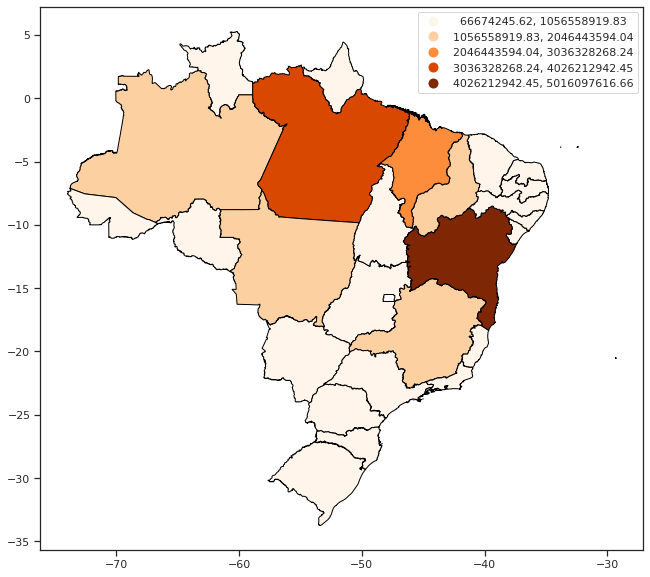

In [65]:
brazil_residences.plot(column="Total Pago BRL",
            figsize=(16,10),
            legend = True,
            cmap='Oranges',
            scheme = 'equalinterval',
            legend_kwds={'fmt': "{:.2f}"},
            edgecolor ='black')

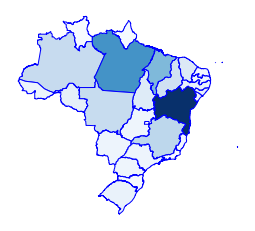

In [66]:
fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

#cax = divider.append_axes("right", size="10%", pad="5%")

ax.set_axis_off()

#fig.suptitle('Valor pago por Estado no perído de 2004 até 2020')

brazil_residences.plot(column="Total Pago BRL",
                        ax=ax,
                        legend=True,
                        cmap='Blues',
                        edgecolor ='Blue',
                        cax = cax,
                        legend_kwds={'fmt': "{:.2f}"}
                        )


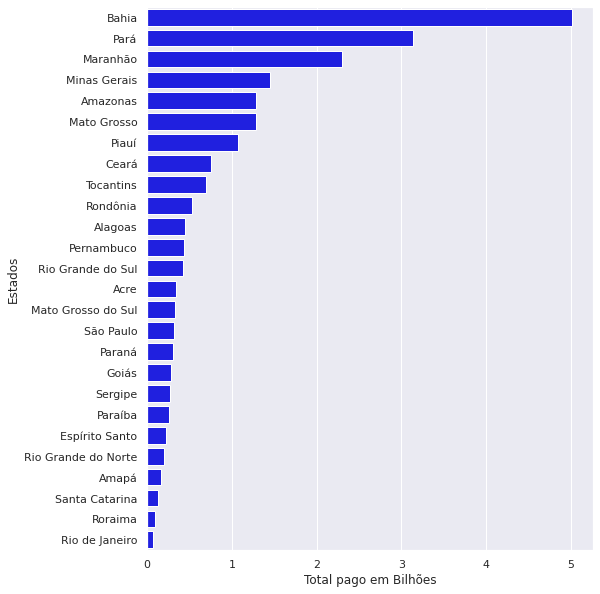

In [67]:
sns.set(style="darkgrid")   
fig, ax = plt.subplots(figsize=(8, 10))   
g = sns.barplot(data = brazil_residences,
            x = 'Total Pago BRL',
            y = 'lptestado',
            color = 'blue',
            orient='h',
            order=brazil_residences.sort_values('Total Pago BRL',ascending = False).lptestado
            ).set(xlabel='Total pago em Bilhões', ylabel='Estados')
plt.xticks(rotation=0)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000000)))

In [68]:

biding_agency.reset_index(inplace = True)
biding_agency.head()

,Agente Contratante,lptestado,Total Empenhado BRL,Total Pago BRL
0,CEF,Bahia,"75,790,160.00","68,211,144.00"
1,CEF,Maranhão,"28,625,880.00","25,763,292.00"
2,CEF,Paraná,"16,984,470.00","5,095,341.00"
3,CEF,Pará,"37,774,080.00","33,996,672.00"
4,CEF,Pernambuco,"27,077,660.00","24,369,894.00"


In [69]:
# Tabela dos Agente Contratantes
biding_agency = biding_agency.groupby('Agente Contratante')["Total Pago BRL"].sum()
biding_agency


Agente Contratante
CEF       178,444,911.00
ECFS   21,338,698,611.32
ECO       249,333,027.00
UPE         7,888,676.74
UPP        27,363,720.81
Name: Total Pago BRL, dtype: float64

In [70]:
21338698611.32/21801728946.87

0.9787617607448296

In [71]:
print (biding_agency.to_latex(
                            #column_format='llc',
                            #index=False
                            ))

\begin{tabular}{lr}
\toprule
{} &    Total Pago BRL \\
Agente Contratante &                   \\
\midrule
CEF                &    178,444,911.00 \\
ECFS               & 21,338,698,611.32 \\
ECO                &    249,333,027.00 \\
UPE                &      7,888,676.74 \\
UPP                &     27,363,720.81 \\
\bottomrule
\end{tabular}



Total Empenhado BRL   26,806,345,350.96
Total Pago BRL        21,801,728,946.87
dtype: float64

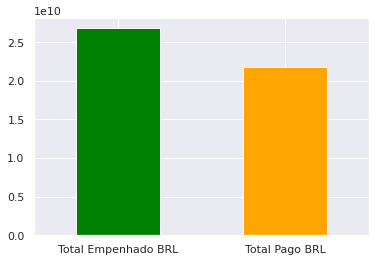

In [72]:
#Print all investment( Budged and the real value paid)
alls_investments=states.agg({'Total Empenhado BRL': 'sum','Total Pago BRL': 'sum'})

alls_investments.plot.bar(rot=0,color=['green','orange'])

alls_investments

In [73]:
print (alls_investments.to_latex(
                            #column_format='llc',
                            #index=False
                            ))

\begin{tabular}{lr}
\toprule
{} &                 0 \\
\midrule
Total Empenhado BRL & 26,806,345,350.96 \\
Total Pago BRL      & 21,801,728,946.87 \\
\bottomrule
\end{tabular}



Budget(R$): 2.680634535096e+16
Total paid amount  (R$): 21801728946870000
Percent   0.81
dtype: float64


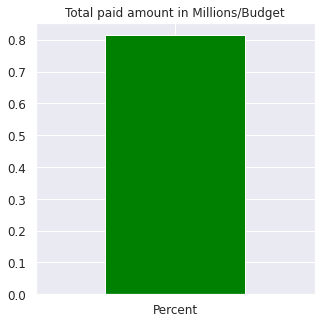

In [74]:
#Print all investment( Budged and the real value paid)
#alls_investments_perc=brasil_states.insert()

#Create 2 Columns which are result from sum of 2 groups of columns
alls_investments['Percent'] = alls_investments['Total Pago BRL']/alls_investments['Total Empenhado BRL']

alls_investments[['Percent']].plot.bar(rot=0,color=['green'],title ="Total paid amount in Millions/Budget", figsize=(5, 5), fontsize=12)
print('Budget(R$):',alls_investments['Total Empenhado BRL']*1000000)
print('Total paid amount  (R$):',round(alls_investments['Total Pago BRL']*1000000))
print(alls_investments[['Percent']])
#alls_investments_perc = alls_investments.apply(lambda row: row.'Total Empenhado BRL'/ row.'Total Pago BRL', axis=1)
#total_paid_amount =resources_applied.apply(lambda row: row.lpt2vlrpagocde + row.lpt2vlrpagorgr+ row.lpt2vlrpagocaixa + row.lpt2vlrpago, axis=1)

#Insert 2 Columns "budget(R$)" and "total_paid_amount(R$)" in our dataframe
#alls_investments.(1,'percentual', 'Total Empenhado BRL'/'Total Pago BRL')
#print(type(alls_investments))

,lptestado,sigla,geocodigo,geometry,lpt1qtddomicilios,Total Empenhado BRL,Total Pago BRL,Valor por residência
0,Goiás,GO,52,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...","50,874.00","514,569,830.00","281,335,040.22","5,530.04"
1,Mato Grosso do Sul,MS,50,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...","44,207.00","356,725,972.94","329,221,760.15","7,447.28"
2,Paraná,PR,41,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...","82,717.00","399,197,675.33","304,678,767.81","3,683.39"
3,Minas Gerais,MG,31,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...","328,413.00","1,649,438,788.82","1,453,311,680.59","4,425.26"
4,Sergipe,SE,28,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...","67,610.00","315,075,695.38","275,681,920.34","4,077.53"
5,Alagoas,AL,27,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...","101,351.00","529,752,444.95","450,483,272.37","4,444.78"
6,Tocantins,TO,17,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...","83,639.00","811,439,485.00","690,792,648.03","8,259.22"
7,Roraima,RR,14,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...","14,995.00","195,653,290.00","96,025,836.19","6,403.86"
8,Amazonas,AM,13,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...","137,282.00","1,604,896,830.00","1,285,155,275.20","9,361.43"
9,Acre,AC,12,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...","58,074.00","422,169,773.54","344,749,554.33","5,936.38"


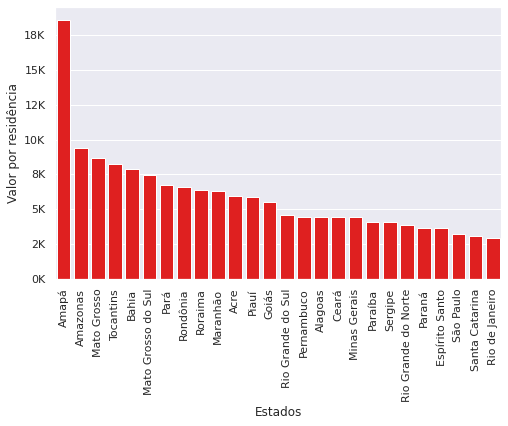

In [75]:
brazil_residences['Valor por residência'] = brazil_residences['Total Pago BRL']/brazil_residences['lpt1qtddomicilios']

sns.set(style="darkgrid")   
fig, ax = plt.subplots(figsize=(8, 5))   
g = sns.barplot(data = brazil_residences,
            x = 'lptestado',
            y = 'Valor por residência',
            color = 'red',
           order=brazil_residences.sort_values('Valor por residência',ascending = False).lptestado 
            ).set(xlabel='Estados', ylabel='Valor por residência')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
brazil_residences